In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random as r
from tqdm import tqdm

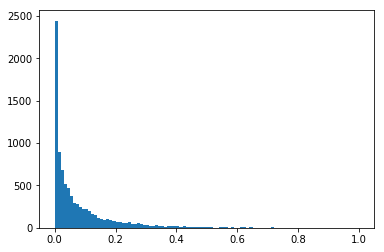

In [2]:
engagement = np.loadtxt('data/engagement.csv')
plt.hist(engagement, bins=100)
plt.savefig('figs/engagement.png')
plt.show()

In [3]:
mean = np.mean(engagement)
std = np.std(engagement)

print("""
Population mean: %.5f
Population std: %.5f
Population size: %i
"""%(mean, std, len(engagement)))


Population mean: 0.07727
Population std: 0.10721
Population size: 8702



#### Sampling distribution

In [4]:
sample_size = 300
n_trials = 100000
samples = [[r.choice(engagement) for _ in range(sample_size)] for _ in range(n_trials)]

In [5]:
means = [np.mean(sample) for sample in samples]

# mean of sampling distribution
sample_mean = np.mean(means)

# empirical standard error
sample_std = np.std(means)

analytical_std = std / np.sqrt(sample_size)

print("""
sampling distribution mean: %.5f
sampling distribution std: %.5f
analytical std: %.5f
"""%(sample_mean, sample_std, analytical_std))


sampling distribution mean: 0.07727
sampling distribution std: 0.00620
analytical std: 0.00619



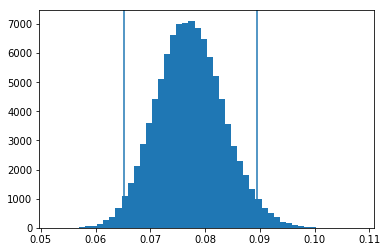

In [6]:
# sampling distribution
z = 1.96
plt.hist(means, bins=50)
plt.axvline(sample_mean - 1.96 * sample_std)
plt.axvline(sample_mean + 1.96 * sample_std)
plt.savefig('figs/sampling_dist.png')
plt.show()

In [7]:
print("lower tail: %.2f%%"%(100 * sum(means < sample_mean - 1.96 * sample_std) / len(means)))

lower tail: 1.97%


In [8]:
print("upper tail: %.2f%%"%(100 * sum(means > sample_mean + 1.96 * sample_std) / len(means)))

upper tail: 2.95%


In [9]:
import pylab 
import scipy.stats as stats

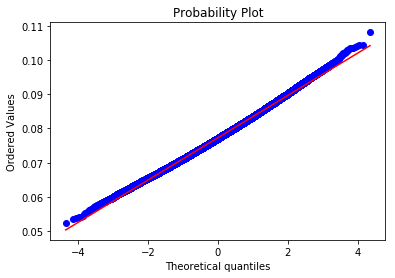

In [10]:
stats.probplot(means, dist="norm", plot=pylab)
pylab.savefig('figs/qq_plot.png')
pylab.show()

#### Confidence Interval
* in this example, null hypothesis is true.
* we get 0.05 false positive rate, under the 95% confidence interval

In [11]:
# make 95% confidence interval
z = 1.96

In [12]:
success = 0
los = []
ups = []
for sample in tqdm(samples):
    x = np.mean(sample)
    s = np.std(sample)
    up = x + z * s / np.sqrt(sample_size)
    lo = x - z * s / np.sqrt(sample_size)
    los.append(lo)
    ups.append(up)
    if lo <= mean and mean <= up:
        success += 1
print("False positive rate: %.3f"%(1 - success / len(samples)))

100%|██████████| 100000/100000 [00:08<00:00, 11984.51it/s]

False positive rate: 0.056


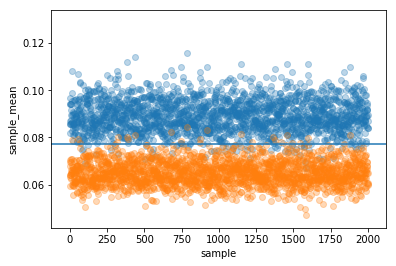

In [13]:
n_points = 2000
plt.scatter(list(range(len(ups[:n_points]))), ups[:n_points], alpha=0.3)
plt.scatter(list(range(len(los[:n_points]))), los[:n_points], alpha=0.3)
plt.axhline(y=0.07727)

plt.xlabel("sample")
plt.ylabel("sample_mean")
plt.savefig("figs/ci.png")